In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import ta

In [2]:
SYMBOL = 'ETH'
from_csv = pd.read_csv(f'../../data/{SYMBOL}.csv')
df = from_csv.set_index(pd.DatetimeIndex(from_csv['begins_at'].values))
df = df.rename(columns={"begins_at":"time", "open_price":"open", "close_price":"close", "low_price":"low", "high_price":"high"})
df['average'] = df[['high','low']].mean(axis=1)
df = df.drop(columns=["time"])

In [3]:

def scale1ToPrice(price, to_scale):
    return (to_scale / (to_scale.max() - to_scale.min())) * (price.max() - price.min()) + price.min()


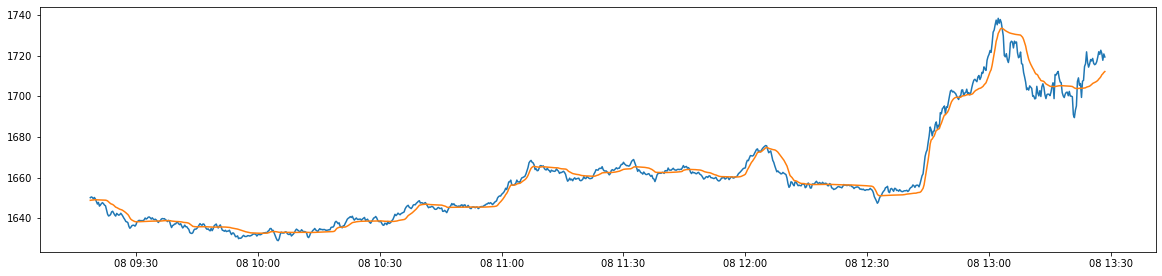

In [4]:
plt.figure(figsize=(20,4.5)) #width = 12.2in, height = 4.5
df['kama'] = ta.momentum.KAMAIndicator(df.average, window = 28).kama()
df['rsi'] = ta.momentum.RSIIndicator(df.average, window= 28).rsi()
plt.plot(df.average.tail(1000))
plt.plot(df.kama.tail(1000))


[]

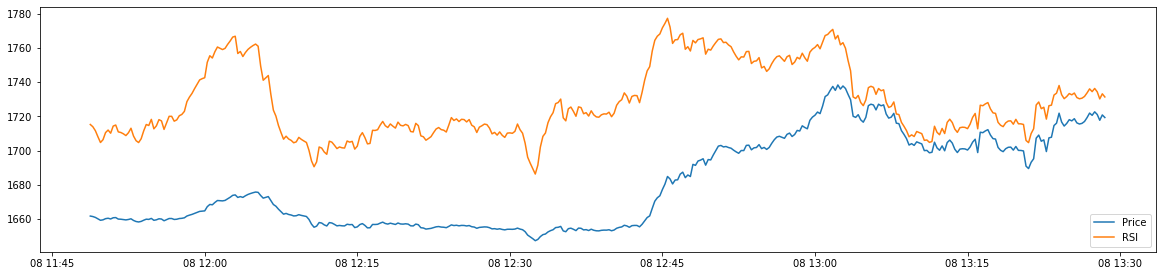

In [5]:
plt.figure(figsize=(20,4.5)) #width = 12.2in, height = 4.5
plt.plot(df.average.tail(400), label="Price")
plt.plot(scale1ToPrice(df.average.tail(400), df.rsi.tail(400)), label="RSI")
plt.legend(loc='lower right')
plt.plot()

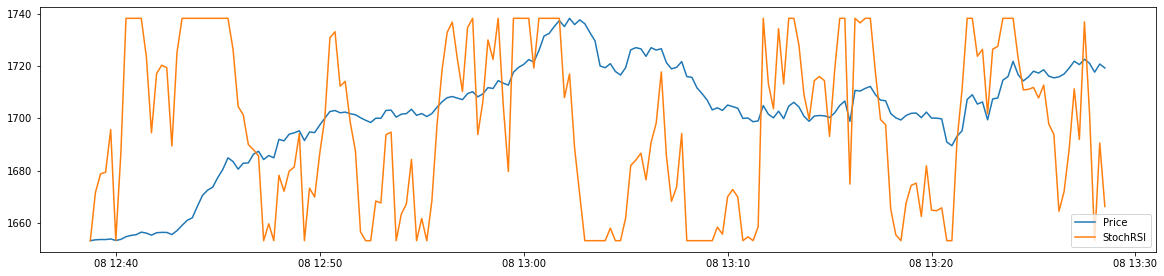

In [6]:
plt.figure(figsize=(20,4.5)) #width = 12.2in, height = 4.5
plt.plot(df.average.tail(200), label="Price")
plt.plot(scale1ToPrice(df.average.tail(200), ta.momentum.StochRSIIndicator(df.average).stochrsi().tail(200)), label="StochRSI")
plt.legend(loc='lower right')
plt.show()

### Strategies

In [ ]:
def calculate_indicators(dataframe):
    # Stoch
    stoch = ta.STOCH(dataframe)
    dataframe['slowk'] = stoch['slowk']

    # RSI
    dataframe['rsi'] = ta.RSI(dataframe)

    # Inverse Fisher transform on RSI, values [-1.0, 1.0] (https://goo.gl/2JGGoy)
    rsi = 0.1 * (dataframe['rsi'] - 50)
    dataframe['fisher_rsi'] = (numpy.exp(2 * rsi) - 1) / (numpy.exp(2 * rsi) + 1)

    # Bollinger bands
    bollinger = qtpylib.bollinger_bands(qtpylib.typical_price(dataframe), window=20, stds=2)
    dataframe['bb_lowerband'] = bollinger['lower']

    # SAR Parabol
    dataframe['sar'] = ta.SAR(dataframe)

    # Hammer: values [0, 100]
    dataframe['CDLHAMMER'] = ta.CDLHAMMER(dataframe)

    return dataframe

In [ ]:
def buy_strat_1(dataframe, i):


In [ ]:
def sell_strat_1(dataframe, i, bought_at_index):
    return False

### Analysis Helper functions

In [9]:
#Create a function to signal when to buy and sell an asset
def calculate_when_to_trade(dataframe, sell_function, buy_function):
  sigPriceBuy = []
  sigPriceSell = []
  cycles = []
  bought = False
  for index in range(0,len(df)):
    current_price = dataframe['price'][i]
    if buy_function(dataframe, index):
        if bought == False:
            sigPriceBuy.append(current_price)
            sigPriceSell.append(np.nan)
            bought = index
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    elif sell_function(dataframe, i, bought): 
        if bought != False:
            sigPriceSell.append(current_price)
            sigPriceBuy.append(np.nan)
            cycles.append(current_price - dataframe['price'][bought])
            bought = False
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    else: #Handling nan values
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  
    return (sigPriceBuy, sigPriceSell, cycles)

In [10]:
def plot(df, sigPriceBuy, sigPriceSell):
    plt.xticks(rotation=45)
    plt.plot( df['real_price'],  label='price', linewidth=1)
    plt.scatter(df.index, sigPriceBuy, color = 'green', label='Buy Signal', marker = '^', alpha = 1)
    plt.scatter(df.index, sigPriceSell, color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

### Plot when to Trade

In [11]:
sigPriceBuy, sigPriceSell, cycles = calculate_when_to_trade(df, buy_strat_1, sell_strat_1)

print("Executed buy and sell strategies:")
print(f"Number of cycles: ${len(cycles)}")
print(f"Total: ${cycles.sum():.2f}")
print(f"Avg profit/cycle: ${cycles.sum()/len(cycles):.2f}")

plt.box(cycles)
plt.show()

plot(dataframe, sigPriceBuy, sigPriceSell)

NameError: name 'dataframe' is not defined